Расчет силы действующей на проводник со стороны переменного магнитного поля

А.Ю.Дроздов

In [1]:
from IPython.display import display, Math, Latex

In [2]:
mu = var('mu')
assume(mu, 'real')
assume(mu>0)

epsilon = var('epsilon')
assume(epsilon, 'real')
assume(epsilon>0)

s = var ('s')
assume(s, 'real')
assume(s>0)

kappa = var ('kappa')
assume(kappa, 'real')
assume(kappa>0)

k = var ('k')
assume(k, 'real')

a = var('a')
assume(a, 'real')
assume(a>0)

x = var('x')
y = var('y')
z = var('z')
t = var('t')

assume(x, 'real')
assume(y, 'real')
assume(z, 'real')
assume(t, 'real')

c = var('c')
assume(c, 'real')
assume(c>0)

omega_t = var('omega')
assume(omega, 'real')
assume(omega > 0)

omega_t = var('omega_t')
assume(omega_t, 'real')

sigma = var('sigma')
assume(sigma, 'real')
assume(sigma > 0)

H_0 = var('H_0')
assume(H_0, 'real')

In [3]:
digit_values2 = [c       == 299792458 * 100,
                 epsilon == 1e+9,
                 mu      == 1,
                 H_0     == 1,
                 omega   == 100000]

digit_values3 = digit_values2 + [sigma == (62500000 * (9*10^9))]

In [4]:
# глубина проникновения магнитного поля в проводник
# Ландау Лифшиц. Электродинамика сплошных сред (59.4)
delta = c / sqrt(2*pi*sigma*omega)
display(Math(latex(delta)))

<IPython.core.display.Math object>

In [5]:
# магнитное поле в проводнике
# Ландау Лифшиц. Электродинамика сплошных сред (59.3)
H_y(x) = H_0 * exp(-x/delta) * exp(I*(x/delta - omega * t))
display(Math(latex(H_y(x))))
re_H_y(x) = H_y(x).real_part()
display(Math(latex(re_H_y(x))))

# Ландау Лифшиц. Электродинамика сплошных сред (59.6)
re_H_y(x) = H_0 * exp(-x/delta) * cos(x/delta - omega * t)
display(Math(latex(re_H_y(x))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [6]:
# электрическое поле в проводнике
# Ландау Лифшиц. Электродинамика сплошных сред (59.5)
E_z(x) = H_y(x) * sqrt(omega/(8*pi*sigma)) * (1-I)
display(Math(latex(E_z(x))))
re_E_z_(x) = E_z(x).real_part()
#display(Math(latex(re_E_z(x))))
display(Math(latex(re_E_z_(x).factor())))

# Ландау Лифшиц. Электродинамика сплошных сред (59.6)
re_E_z_(x) = H_0 * sqrt(omega/(4*pi*sigma)) * exp(-x/delta) * cos(x/delta - omega * t - pi/4)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [7]:
# ток проводимости вызванный электрическим полем
# Ландау Лифшиц. Электродинамика сплошных сред (58.4)
j_z_(x) = sigma * re_E_z_(x)
display(Math(latex(j_z_(x))))

<IPython.core.display.Math object>

In [8]:
# сила действующая на ток проводимости со стороны магнитного поля
f_x_(x) = 1 / c * j_z_(x) * re_H_y(x)
# print("f_x =", f_x_(x))
show(f_x_(x))

1/2*H_0^2*sigma*sqrt(omega/(pi*sigma))*cos(-1/4*pi - omega*t + sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c)*cos(-omega*t + sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c)*e^(-2*sqrt(2)*sqrt(pi*omega*sigma)*x/c)/c

In [9]:
# делаем замену переменной для удобства интегрирования по периоду колебаний
str_f_x_ = str(f_x_(x))
print(str_f_x_)
print("")
str_f_x_ = str_f_x_.replace('omega*t', 'omega_t')
print(str_f_x_)
print("")
exec(preparse("f_x_s_(x) = " + str_f_x_))
print(f_x_s_(x))

1/2*H_0^2*sigma*sqrt(omega/(pi*sigma))*cos(-1/4*pi - omega*t + sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c)*cos(-omega*t + sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c)*e^(-2*sqrt(2)*sqrt(pi*omega*sigma)*x/c)/c

1/2*H_0^2*sigma*sqrt(omega/(pi*sigma))*cos(-1/4*pi - omega_t + sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c)*cos(-omega_t + sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c)*e^(-2*sqrt(2)*sqrt(pi*omega*sigma)*x/c)/c

1/2*H_0^2*sigma*sqrt(omega/(pi*sigma))*cos(-1/4*pi + sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c - omega_t)*cos(sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c - omega_t)*e^(-2*sqrt(2)*sqrt(pi*omega*sigma)*x/c)/c


In [10]:
# усредняем по периоду колебаний
F_x_(x) = (1/(2*pi))*integrate(f_x_s_(x), (omega_t, 0, 2*pi))
display(Math(latex(F_x_(x))))

<IPython.core.display.Math object>

In [11]:
# интегрируем по глубине
int_F_x_(x) = integrate(F_x_(x), x)

In [12]:
int_F_x_(x)

-1/128*(8*pi*c*e^(-2*sqrt(2)*sqrt(pi*omega*sigma)*x/c)/sqrt(pi*omega*sigma) + (sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*cos(-1/4*pi + 2*sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c)/c + sqrt(2)*sqrt(pi*omega*sigma)*sin(-1/4*pi + 2*sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c)/c)*c^2*e^(-2*sqrt(2)*sqrt(pi*omega*sigma)*x/c)/(pi*omega*sigma) - (sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*cos(-17/4*pi + 2*sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c)/c + sqrt(2)*sqrt(pi*omega*sigma)*sin(-17/4*pi + 2*sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c)/c)*c^2*e^(-2*sqrt(2)*sqrt(pi*omega*sigma)*x/c)/(pi*omega*sigma))*H_0^2*sigma*sqrt(omega/(pi*sigma))/(pi*c)

In [13]:
display(Math(latex(int_F_x_(x))))

<IPython.core.display.Math object>

In [14]:
# силы действующей на проводник со стороны переменного магнитного поля
F_(x) = -int_F_x_(0)

In [15]:
display(Math(latex(F_(x).full_simplify().expand())))

<IPython.core.display.Math object>

In [16]:
# вычисляем силу действующую со стороны магнитного поля на ток Фуко в скин слое
# методом комплексного сопряжения
f_conj = (1/2/c*sigma*E_z(x) * conjugate(H_y(x))).real()
show(f_conj)
F_conj = integrate(f_conj, x, 0, Infinity).full_simplify()
show(F_conj)

1/4*sqrt(1/2)*H_0^2*sqrt(omega)*sqrt(sigma)*cosh(2*sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c)/(sqrt(pi)*c) - 1/4*sqrt(1/2)*H_0^2*sqrt(omega)*sqrt(sigma)*sinh(2*sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c)/(sqrt(pi)*c)

1/16*H_0^2/pi

In [17]:
latex(F_(x).full_simplify().expand())

\frac{H_{0}^{2}}{16 \, \pi}

In [18]:
F_simp = (F_(x).full_simplify()/(-H_0^2/(16*pi))).expand()
F_simp

-1

In [19]:
display(Math(latex(F_simp)))

<IPython.core.display.Math object>

я получил результат в 2 раза меньший, чем ожидавшийся результат 
$$\frac{H_{0}^{2}}{8 \, \pi}$$
потому что additional 1/2 arises as result of integration on period

In [20]:
exp (I * pi).real(), exp (I * pi).imag()

(-1, 0)

In [21]:
# а что если в данном расчете изменится сдвиг фаз между электрическим и магнитным полем?
phi = var("phi")
assume(phi, "real")

In [22]:
# электрическое поле в проводнике
# Ландау Лифшиц. Электродинамика сплошных сред (59.5)
E_z(x) = H_y(x) * sqrt(omega/(8*pi*sigma)) * (1-I)
show(E_z(x))
# делаем небольшой сдвиг фаз на угол + phi
E_z_l(x) = H_y(x) * sqrt(omega/(8*pi*sigma)) * (1-I) * exp (I * phi)
show(E_z_l(x))
# делаем сдвиг фаз на угол + pi + phi
E_z_r(x) = H_y(x) * sqrt(omega/(8*pi*sigma)) * (1-I) * exp (I * phi) * exp (I * pi)
show(E_z_r(x))

re_E_z_(x) = E_z(x).real_part()
#display(Math(latex(re_E_z(x))))
display(Math(latex(re_E_z_(x).factor())))

# Ландау Лифшиц. Электродинамика сплошных сред (59.6)
re_E_z_(x) = H_0 * sqrt(omega/(4*pi*sigma)) * exp(-x/delta) * cos(x/delta - omega * t - pi/4)

# а что если в данном расчете изменится сдвиг фаз между электрическим и магнитным полем?

#left
re_E_z_l(x) = H_0 * sqrt(omega/(4*pi*sigma)) * exp(-x/delta) * cos(x/delta - omega * t - pi/4 + phi)
#right
re_E_z_r(x) = H_0 * sqrt(omega/(4*pi*sigma)) * exp(-x/delta) * cos(x/delta - omega * t - pi/4 + pi + phi)
display(Math(latex(re_E_z_l(x))))
display(Math(latex(re_E_z_r(x))))

-(1/2*I - 1/2)*sqrt(1/2)*H_0*sqrt(omega/(pi*sigma))*e^(-I*omega*t + (I - 1)*sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c)

-(1/2*I - 1/2)*sqrt(1/2)*H_0*sqrt(omega/(pi*sigma))*e^(-I*omega*t + (I - 1)*sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c + I*phi)

(1/2*I - 1/2)*sqrt(1/2)*H_0*sqrt(omega/(pi*sigma))*e^(-I*omega*t + (I - 1)*sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c + I*phi)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [23]:
# ток проводимости вызванный электрическим полем
# Ландау Лифшиц. Электродинамика сплошных сред (58.4)
j_z_l(x) = sigma * re_E_z_l(x)
j_z_r(x) = sigma * re_E_z_r(x)
show(j_z_l(x))
show(j_z_r(x))

1/2*H_0*sigma*sqrt(omega/(pi*sigma))*cos(-1/4*pi - omega*t + sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c + phi)*e^(-sqrt(2)*sqrt(pi*omega*sigma)*x/c)

1/2*H_0*sigma*sqrt(omega/(pi*sigma))*cos(3/4*pi - omega*t + sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c + phi)*e^(-sqrt(2)*sqrt(pi*omega*sigma)*x/c)

In [24]:
# сила действующая на ток проводимости со стороны магнитного поля
f_x_l(x) = 1 / c * j_z_l(x) * re_H_y(x)
f_x_r(x) = 1 / c * j_z_r(x) * re_H_y(x)
#print("f_x =", f_x(x))
show(f_x_l(x))
show(f_x_r(x))

1/2*H_0^2*sigma*sqrt(omega/(pi*sigma))*cos(-1/4*pi - omega*t + sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c + phi)*cos(-omega*t + sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c)*e^(-2*sqrt(2)*sqrt(pi*omega*sigma)*x/c)/c

1/2*H_0^2*sigma*sqrt(omega/(pi*sigma))*cos(3/4*pi - omega*t + sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c + phi)*cos(-omega*t + sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c)*e^(-2*sqrt(2)*sqrt(pi*omega*sigma)*x/c)/c

In [25]:
# делаем замену переменной для удобства интегрирования по периоду колебаний
str_f_x_l = str(f_x_l(x))
str_f_x_r = str(f_x_r(x))
# print(str_f_x)
#print("")
str_f_x_l = str_f_x_l.replace('omega*t', 'omega_t')
str_f_x_r = str_f_x_r.replace('omega*t', 'omega_t')
#print(str_f_x)
#print("")
exec(preparse("f_x_s_l(x) = " + str_f_x_l))
exec(preparse("f_x_s_r(x) = " + str_f_x_r))
print(f_x_s_l(x))

1/2*H_0^2*sigma*sqrt(omega/(pi*sigma))*cos(-1/4*pi + sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c - omega_t + phi)*cos(sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c - omega_t)*e^(-2*sqrt(2)*sqrt(pi*omega*sigma)*x/c)/c


In [26]:
# усредняем по периоду колебаний
F_x_l(x) = (1/(2*pi))*integrate(f_x_s_l(x), (omega_t, 0, 2*pi))
F_x_r(x) = (1/(2*pi))*integrate(f_x_s_r(x), (omega_t, 0, 2*pi))

show(F_x_l(x))
show(F_x_r(x))

1/16*(4*pi*cos(-1/4*pi + phi) + sin(-1/4*pi + 2*sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c + phi) - sin(-17/4*pi + 2*sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c + phi))*H_0^2*sigma*sqrt(omega/(pi*sigma))*e^(-2*sqrt(2)*sqrt(pi*omega*sigma)*x/c)/(pi*c)

1/16*(4*pi*cos(3/4*pi + phi) + sin(3/4*pi + 2*sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c + phi) - sin(-13/4*pi + 2*sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c + phi))*H_0^2*sigma*sqrt(omega/(pi*sigma))*e^(-2*sqrt(2)*sqrt(pi*omega*sigma)*x/c)/(pi*c)

In [27]:
F_x_l(x).subs(digit_values3).subs(phi == 0.01).subs(x == 0).n()

0.796875430968640

In [28]:
from scipy import integrate as scipy_integrate

In [29]:
# усредняем по периоду колебаний
fel = lambda x, _phi_ : scipy_integrate.quad( \
    lambda omega_t : \
        float(f_x_s_l(x = x, omega_t = omega_t).subs(digit_values3).subs(phi == _phi_)), \
            0, (2*pi))[0] / (2*pi)

In [30]:
# усредняем по периоду колебаний
fer = lambda x, _phi_ : scipy_integrate.quad( \
    lambda omega_t : \
        float(f_x_s_r(x = x, omega_t = omega_t).subs(digit_values3).subs(phi == _phi_)), \
            0, (2*pi))[0] / (2*pi)

In [31]:
fel(x = 0, _phi_ = 0).n()

0.789024765724393

In [32]:
F_x_l(x).subs(digit_values3).subs(phi == 0.00, x == 0).n()

0.789024765724393

In [33]:
h_conductor = 0.25

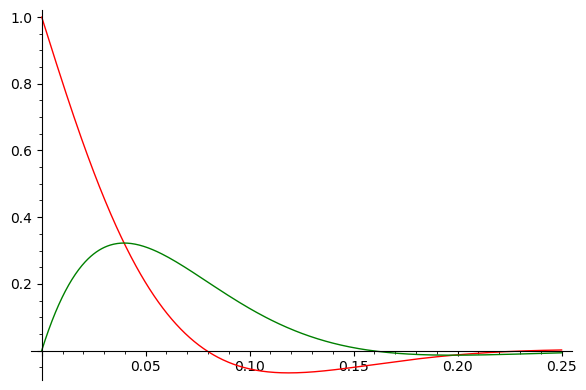

In [34]:
plt = Graphics()
plt += plot (H_y(x).subs(digit_values3).subs(t == 0).real(), x, 0, h_conductor, color="red")
plt += plot (H_y(x).subs(digit_values3).subs(t == 0).imag(), x, 0, h_conductor, color="green")
plt.show()

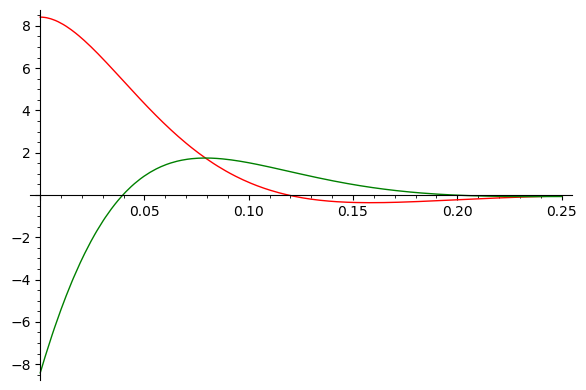

In [35]:
plt = Graphics()
plt += plot (E_z(x).subs(digit_values3).subs(t == 0).real(), x, 0, h_conductor, color="red")
plt += plot (E_z(x).subs(digit_values3).subs(t == 0).imag(), x, 0, h_conductor, color="green")
plt.show()

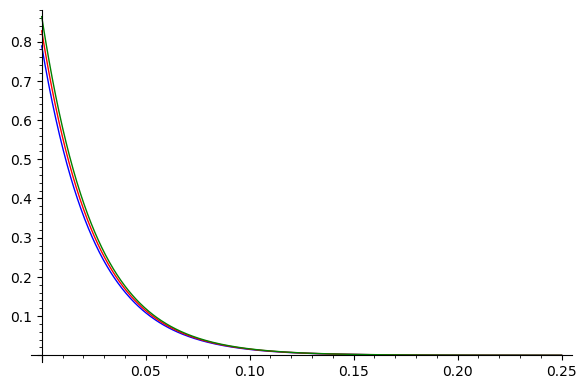

In [36]:
plt = Graphics()
plt += plot (F_x_l(x).subs(digit_values3).subs(phi == 0.00), x, 0, h_conductor)
plt += plot (F_x_l(x).subs(digit_values3).subs(phi == 0.05), x, 0, h_conductor, color="red")
plt += plot (F_x_l(x).subs(digit_values3).subs(phi == 0.10), x, 0, h_conductor, color="green")
plt.show()

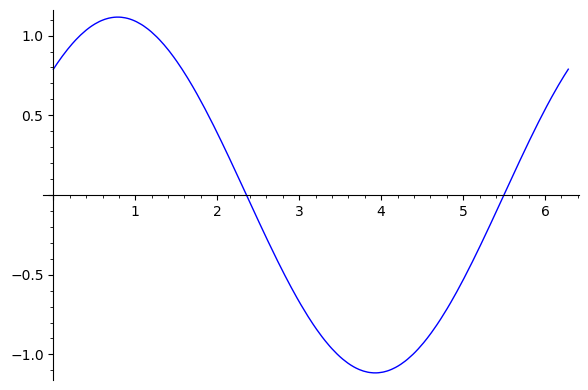

In [37]:
plot (F_x_l(x).subs(digit_values3).subs(x == 0), phi, 0, 2*pi)

In [38]:
# интегрируем по глубине
int_F_x_l(x) = integrate(F_x_l(x), x)
int_F_x_r(x) = integrate(F_x_r(x), x)

In [39]:
# усредняем по периоду колебаний
# и интегрируем по глубине
Fel = lambda _phi_ : scipy_integrate.nquad( \
    lambda _x_, _omega_t_ : \
        float(f_x_s_l(x = _x_, omega_t = _omega_t_).subs(digit_values3).subs(phi == _phi_)), \
            [[0, h_conductor], [0, 2*pi]] )[0] / (2*pi)

In [40]:
# усредняем по периоду колебаний
# и интегрируем по глубине
Fer = lambda _phi_ : scipy_integrate.nquad( \
    lambda _x_, _omega_t_ : \
        float(f_x_s_r(x = _x_, omega_t = _omega_t_).subs(digit_values3).subs(phi == _phi_)), \
            [[0, h_conductor], [0, 2*pi]] )[0] / (2*pi)

In [41]:
#int_F_x(x)

In [42]:
#display(Math(latex(int_F_x(x))))

In [43]:
# силы действующей на проводник со стороны переменного магнитного поля
F_l = limit(int_F_x_l(x).expand(), x=Infinity)
F_r = limit(int_F_x_r(x).expand(), x=Infinity)
show(F_l)
show(F_r)

0

0

In [44]:
# силы действующей на проводник со стороны переменного магнитного поля
F_l = -int_F_x_l(0)
F_r = -int_F_x_r(0)

In [45]:
show(F_l.full_simplify().expand())
show(F_r.full_simplify().expand())

1/16*H_0^2*cos(phi)/pi + 1/16*H_0^2*sin(phi)/pi

-1/16*H_0^2*cos(phi)/pi - 1/16*H_0^2*sin(phi)/pi

In [46]:
latex(F_l.full_simplify().expand())

\frac{H_{0}^{2} \cos\left(\phi\right)}{16 \, \pi} + \frac{H_{0}^{2} \sin\left(\phi\right)}{16 \, \pi}

In [47]:
F_simp_l = (F_l.full_simplify()/(-H_0^2/(16*pi))).expand()
F_simp_r = (F_r.full_simplify()/(-H_0^2/(16*pi))).expand()
F_simp_l, F_simp_r

(-cos(phi) - sin(phi), cos(phi) + sin(phi))

In [48]:
show(F_simp_l)
show(F_simp_r)

-cos(phi) - sin(phi)

cos(phi) + sin(phi)

In [49]:
# вычисляем силу действующую со стороны магнитного поля на ток Фуко в скин слое
# методом комплексного сопряжения
f_conj_l = (1/2/c*sigma*E_z_l(x) * conjugate(H_y(x))).real()
f_conj_r = (1/2/c*sigma*E_z_r(x) * conjugate(H_y(x))).real()
show(f_conj_l)
print("")
show(f_conj_r)
print("")
# интегрируем по глубине скин слоя
F_conj_l = integrate(f_conj_l, x, 0, Infinity).full_simplify()
F_conj_r = integrate(f_conj_r, x, 0, Infinity).full_simplify()
show(F_conj_l)
show(F_conj_r)

1/4*sqrt(1/2)*H_0^2*sqrt(omega)*sqrt(sigma)*cos(phi)*cosh(2*sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c)/(sqrt(pi)*c) + 1/4*sqrt(1/2)*H_0^2*sqrt(omega)*sqrt(sigma)*cosh(2*sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c)*sin(phi)/(sqrt(pi)*c) - 1/4*sqrt(1/2)*H_0^2*sqrt(omega)*sqrt(sigma)*cos(phi)*sinh(2*sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c)/(sqrt(pi)*c) - 1/4*sqrt(1/2)*H_0^2*sqrt(omega)*sqrt(sigma)*sin(phi)*sinh(2*sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c)/(sqrt(pi)*c)

-1/4*sqrt(1/2)*H_0^2*sqrt(omega)*sqrt(sigma)*cos(phi)*cosh(2*sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c)/(sqrt(pi)*c) - 1/4*sqrt(1/2)*H_0^2*sqrt(omega)*sqrt(sigma)*cosh(2*sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c)*sin(phi)/(sqrt(pi)*c) + 1/4*sqrt(1/2)*H_0^2*sqrt(omega)*sqrt(sigma)*cos(phi)*sinh(2*sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c)/(sqrt(pi)*c) + 1/4*sqrt(1/2)*H_0^2*sqrt(omega)*sqrt(sigma)*sin(phi)*sinh(2*sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c)/(sqrt(pi)*c)

1/16*(H_0^2*cos(phi) + H_0^2*sin(phi))/pi

-1/16*(H_0^2*cos(phi) + H_0^2*sin(phi))/pi

In [50]:
Fel (_phi_ = 0).n(), Fel (_phi_ = 0.05).n(), Fel (_phi_ = 0.10).n()

(0.0198933847287236, 0.0208627780206735, 0.0217800252326965)

In [51]:
Fer (_phi_ = 0).n(), Fer (_phi_ = 0.05).n(), Fer (_phi_ = 0.10).n()

(-0.0198933847287236, -0.0208627780206735, -0.0217800252326965)

In [52]:
F_l.subs(digit_values3).subs(phi == 0.00).n(), \
F_l.subs(digit_values3).subs(phi == 0.05).n(), \
F_l.subs(digit_values3).subs(phi == 0.10).n()

(0.0198943678864869, 0.0208638090871539, 0.0217811016307648)

In [53]:
F_r.subs(digit_values3).subs(phi == 0.00).n(), \
F_r.subs(digit_values3).subs(phi == 0.05).n(), \
F_r.subs(digit_values3).subs(phi == 0.10).n()

(-0.0198943678864869, -0.0208638090871539, -0.0217811016307648)

я получил результат в 2 раза меньший, чем ожидавшийся результат 
$$\frac{H_{0}^{2}}{8 \, \pi}$$
потому что additional 1/2 arises as result of integration on period

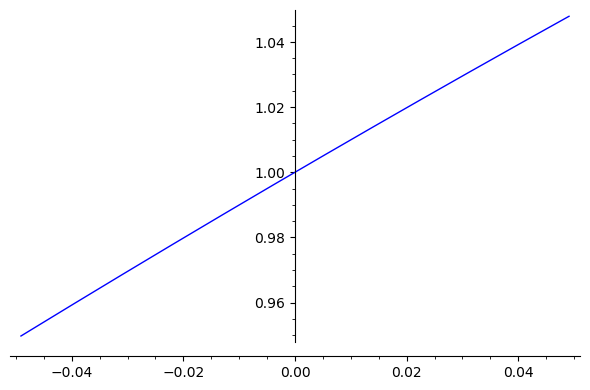

In [54]:
plot(cos(phi) + sin(phi), phi, -pi/64, pi/64)

Но есть вопрос

Исходя например из результатов опытов С.Б. Каравашкина по исследованию токов Фуко в разных материалах

https://sbkaravashkin.blogspot.com/2014/10/1.html

https://sbkaravashkin.blogspot.com/2014/10/2.html, изменится ли в данном расчете сдвиг фаз между электрическим и магнитным полем?

In [55]:
# Ниже численное моделирование на примере золота

Au_sigma_SI = 42.2 * 10^6 # Sm/m
Au_sigma_sgse = 9*10^9 * Au_sigma_SI
digit_values = [sigma == Au_sigma_sgse, c == 299792458 * 100 , epsilon == 1, mu == 1, H_0 == 1, omega == 2.98046134067856e15]
F_x_d_l(x) = F_x_l(x).subs(digit_values)
display(Math(latex(F_x_d_l(x))))

<IPython.core.display.Math object>

In [56]:
delta .subs(digit_values).n()

3.55477029224551e-7

In [57]:
# мкм
delta .subs(digit_values).n()*10*1000 

0.00355477029224551

In [58]:
int_F_x_l_d(x) = int_F_x_l(x).subs(digit_values)
show(int_F_x_l_d(x))

-8767.75799672667*((7.12839017948871e-6)*sqrt(2)*sqrt(pi)*(cosh(2.24454604716203e6*sqrt(2)*sqrt(pi)*x) - sinh(2.24454604716203e6*sqrt(2)*sqrt(pi)*x))*cos(-1/4*pi + phi) + (7.93967914859861e-13)*(1.12227302358101e6*sqrt(2)*sqrt(pi)*cos(-1/4*pi + 2.24454604716203e6*sqrt(2)*sqrt(pi)*x + phi) + 1.12227302358101e6*sqrt(2)*sqrt(pi)*sin(-1/4*pi + 2.24454604716203e6*sqrt(2)*sqrt(pi)*x + phi))*(cosh(2.24454604716203e6*sqrt(2)*sqrt(pi)*x) - sinh(2.24454604716203e6*sqrt(2)*sqrt(pi)*x))/pi - (7.93967914859861e-13)*(1.12227302358101e6*sqrt(2)*sqrt(pi)*cos(-17/4*pi + 2.24454604716203e6*sqrt(2)*sqrt(pi)*x + phi) + 1.12227302358101e6*sqrt(2)*sqrt(pi)*sin(-17/4*pi + 2.24454604716203e6*sqrt(2)*sqrt(pi)*x + phi))*(cosh(2.24454604716203e6*sqrt(2)*sqrt(pi)*x) - sinh(2.24454604716203e6*sqrt(2)*sqrt(pi)*x))/pi)/pi^(3/2)

plot(int_F_x_d(x), (x, 0, 0.000001))

In [59]:
int_F_x_l_d(0)

-8767.75799672667*((7.12839017948871e-6)*sqrt(2)*sqrt(pi)*cos(-1/4*pi + phi) + (7.93967914859861e-13)*(1.12227302358101e6*sqrt(2)*sqrt(pi)*cos(-1/4*pi + phi) + 1.12227302358101e6*sqrt(2)*sqrt(pi)*sin(-1/4*pi + phi))/pi - (7.93967914859861e-13)*(1.12227302358101e6*sqrt(2)*sqrt(pi)*cos(-17/4*pi + phi) + 1.12227302358101e6*sqrt(2)*sqrt(pi)*sin(-17/4*pi + phi))/pi)/pi^(3/2)

In [60]:
int_F_x_l_d(0.01).n()

0

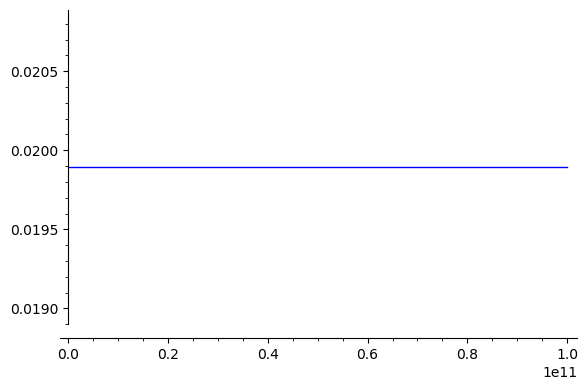

In [61]:
plot(F_(x).subs(digit_values2), sigma, 0, 100000000000)

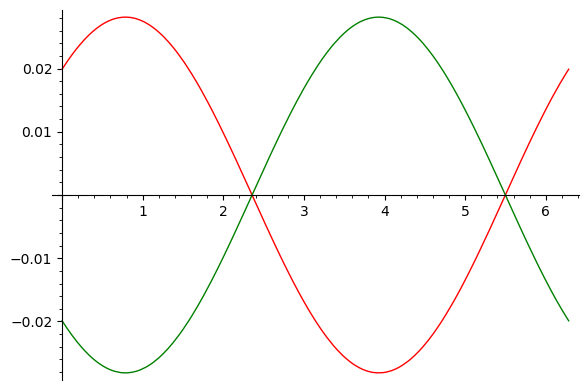

In [62]:
(plot(F_l.subs(digit_values3), phi, 0, 2*pi, color = "red") +
 plot(F_r.subs(digit_values3), phi, 0, 2*pi, color = "green")
).show()

In [63]:
# Abraham force
# (epsilon * mu - 1) / (4 * pi * c) * ([E x H]).diff(t)
# (epsilon * mu - 1) / (4 * pi * c) * ([E.diff(t) x H] + [E x H.diff(t)])
# ([a x b])_x = a_y * b_z - a_z * b_y
# f_x = (epsilon * mu - 1) / (4 * pi * c) * (-E_z.diff(t) * H_y - E_z * H_y.diff(t))


# omega_t = - omega * t\n",


# f_x = (epsilon * mu - 1) / (4 * pi * c) *
#       integrate(
#         ( - Re(-I*omega * E_z * e^omega_t) * Re(H_y * e^omega_t)) +
#         ( - Re(E_z * e^omega_t) * Re(-I*omega * H_y * e^omega_t))
#       (omega_t, 0, 2*pi))\n",


# f_x = (epsilon * mu - 1) / (2 * 4 * pi * c) * (
#             ( - Re(-I*omega * E_z) * Re(H_y) - Im(-I*omega * E_z) * Im(H_y)) +
#             ( - Re(E_z) * Re(-I*omega * H_y) - Im(E_z) * Im(-I*omega * H_y))
#       )

In [64]:
f_abr_x_ = (epsilon * mu - 1) / (4 * pi * c) * (-E_z.diff(t) * H_y - E_z * H_y.diff(t))
show(f_abr_x_(x))

(1/4*I + 1/4)*sqrt(1/2)*(epsilon*mu - 1)*H_0^2*omega*sqrt(omega/(pi*sigma))*e^(-2*I*omega*t + (2*I - 2)*sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c)/(pi*c)

In [65]:
f_abr_x_l = (epsilon * mu - 1) / (4 * pi * c) * (-re_E_z_l.diff(t) * re_H_y - re_E_z_l * re_H_y.diff(t))
f_abr_x_r = (epsilon * mu - 1) / (4 * pi * c) * (-re_E_z_r.diff(t) * re_H_y - re_E_z_r * re_H_y.diff(t))
show(f_abr_x_l(x))
show(f_abr_x_r(x))

-1/8*(H_0^2*omega*sqrt(omega/(pi*sigma))*cos(-omega*t + sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c)*e^(-2*sqrt(2)*sqrt(pi*omega*sigma)*x/c)*sin(-1/4*pi - omega*t + sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c + phi) + H_0^2*omega*sqrt(omega/(pi*sigma))*cos(-1/4*pi - omega*t + sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c + phi)*e^(-2*sqrt(2)*sqrt(pi*omega*sigma)*x/c)*sin(-omega*t + sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c))*(epsilon*mu - 1)/(pi*c)

-1/8*(H_0^2*omega*sqrt(omega/(pi*sigma))*cos(-omega*t + sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c)*e^(-2*sqrt(2)*sqrt(pi*omega*sigma)*x/c)*sin(3/4*pi - omega*t + sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c + phi) + H_0^2*omega*sqrt(omega/(pi*sigma))*cos(3/4*pi - omega*t + sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c + phi)*e^(-2*sqrt(2)*sqrt(pi*omega*sigma)*x/c)*sin(-omega*t + sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c))*(epsilon*mu - 1)/(pi*c)

In [66]:
# делаем замену переменной для удобства интегрирования по периоду колебаний
str_f_abr_x_l = str(f_abr_x_l(x))
str_f_abr_x_r = str(f_abr_x_r(x))
#print(str_f_x)
#print("")
str_f_abr_x_l = str_f_abr_x_l.replace('omega*t', 'omega_t')
str_f_abr_x_r = str_f_abr_x_r.replace('omega*t', 'omega_t')
#print(str_f_x)
#print("")
exec(preparse("f_abr_x_s_l(x) = " + str_f_abr_x_l))
exec(preparse("f_abr_x_s_r(x) = " + str_f_abr_x_r))
print(f_abr_x_s_l(x))
print("")
print(f_abr_x_s_r(x))

-1/8*(H_0^2*omega*sqrt(omega/(pi*sigma))*cos(sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c - omega_t)*e^(-2*sqrt(2)*sqrt(pi*omega*sigma)*x/c)*sin(-1/4*pi + sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c - omega_t + phi) + H_0^2*omega*sqrt(omega/(pi*sigma))*cos(-1/4*pi + sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c - omega_t + phi)*e^(-2*sqrt(2)*sqrt(pi*omega*sigma)*x/c)*sin(sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c - omega_t))*(epsilon*mu - 1)/(pi*c)

-1/8*(H_0^2*omega*sqrt(omega/(pi*sigma))*cos(sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c - omega_t)*e^(-2*sqrt(2)*sqrt(pi*omega*sigma)*x/c)*sin(3/4*pi + sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c - omega_t + phi) + H_0^2*omega*sqrt(omega/(pi*sigma))*cos(3/4*pi + sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c - omega_t + phi)*e^(-2*sqrt(2)*sqrt(pi*omega*sigma)*x/c)*sin(sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c - omega_t))*(epsilon*mu - 1)/(pi*c)


In [67]:
# усредняем по периоду колебаний
f_abr_x_l(x) = (1/(2*pi))*integrate(f_abr_x_s_l(x), (omega_t, 0, 2*pi))
f_abr_x_r(x) = (1/(2*pi))*integrate(f_abr_x_s_r(x), (omega_t, 0, 2*pi))
show(f_abr_x_l(x))
show(f_abr_x_r(x))

1/32*(H_0^2*omega*sqrt(omega/(pi*sigma))*cos(-1/4*pi + 2*sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c + phi) - H_0^2*omega*sqrt(omega/(pi*sigma))*cos(-17/4*pi + 2*sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c + phi))*(epsilon*mu - 1)*e^(-2*sqrt(2)*sqrt(pi*omega*sigma)*x/c)/(pi^2*c)

1/32*(H_0^2*omega*sqrt(omega/(pi*sigma))*cos(3/4*pi + 2*sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c + phi) - H_0^2*omega*sqrt(omega/(pi*sigma))*cos(-13/4*pi + 2*sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c + phi))*(epsilon*mu - 1)*e^(-2*sqrt(2)*sqrt(pi*omega*sigma)*x/c)/(pi^2*c)

In [68]:
# интегрируем по глубине
int_f_abr_x_l(x) = integrate(f_abr_x_l(x), x)
int_f_abr_x_r(x) = integrate(f_abr_x_r(x), x)
show(int_f_abr_x_l(x))
show(int_f_abr_x_r(x))

1/256*((sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*sin(-1/4*pi + 2*sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c + phi)/c - sqrt(2)*sqrt(pi*omega*sigma)*cos(-1/4*pi + 2*sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c + phi)/c)*H_0^2*c^2*sqrt(omega/(pi*sigma))*e^(-2*sqrt(2)*sqrt(pi*omega*sigma)*x/c)/(pi*sigma) - (sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*sin(-17/4*pi + 2*sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c + phi)/c - sqrt(2)*sqrt(pi*omega*sigma)*cos(-17/4*pi + 2*sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c + phi)/c)*H_0^2*c^2*sqrt(omega/(pi*sigma))*e^(-2*sqrt(2)*sqrt(pi*omega*sigma)*x/c)/(pi*sigma))*(epsilon*mu - 1)/(pi^2*c)

1/256*((sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*sin(3/4*pi + 2*sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c + phi)/c - sqrt(2)*sqrt(pi*omega*sigma)*cos(3/4*pi + 2*sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c + phi)/c)*H_0^2*c^2*sqrt(omega/(pi*sigma))*e^(-2*sqrt(2)*sqrt(pi*omega*sigma)*x/c)/(pi*sigma) - (sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*sin(-13/4*pi + 2*sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c + phi)/c - sqrt(2)*sqrt(pi*omega*sigma)*cos(-13/4*pi + 2*sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c + phi)/c)*H_0^2*c^2*sqrt(omega/(pi*sigma))*e^(-2*sqrt(2)*sqrt(pi*omega*sigma)*x/c)/(pi*sigma))*(epsilon*mu - 1)/(pi^2*c)

In [69]:
# силы Abraham действующей на проводник со стороны переменного магнитного поля
f_l = limit(int_f_abr_x_l(x).expand(), x=Infinity)
f_r = limit(int_f_abr_x_r(x).expand(), x=Infinity)
show(f_l)
show(f_r)

0

0

In [70]:
# силы Abraham действующей на проводник со стороны переменного магнитного поля
f_abr_l = -int_f_abr_x_l(0).expand().full_simplify()
f_abr_r = -int_f_abr_x_r(0).expand().full_simplify()
show(f_abr_l)
show(f_abr_r)

0

0